### Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

In [3]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')

In [5]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [6]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


we have only numeric values in price dataset

In [7]:
client_df.shape

(14606, 26)

In [8]:
price_df.shape

(193002, 8)

### Descriptive Statistics

In [9]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [10]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


So far there data seems consistent we don't have missing or NULL values in the dataset

In [11]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


We can see have our client dataset is highly skewed 

In [12]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [13]:
skewness = client_df.skew()
print(skewness)


cons_12m                           5.997308
cons_gas_12m                       9.597530
cons_last_month                    6.391407
forecast_cons_12m                  7.155853
forecast_cons_year                16.587990
forecast_discount_energy           5.155098
forecast_meter_rent_12m            1.505148
forecast_price_energy_off_peak    -0.119586
forecast_price_energy_peak        -0.014331
forecast_price_pow_off_peak       -4.998772
imp_cons                          13.198799
margin_gross_pow_ele               4.472632
margin_net_pow_ele                 4.473326
nb_prod_act                        8.636878
net_margin                        36.569515
num_years_antig                    1.446214
pow_max                            5.786785
churn                              2.720715
dtype: float64


C:\Users\KIIT\AppData\Local\Temp\ipykernel_30448\1159037954.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewness = client_df.skew()


oh the dataset is heavily skewed we will do some transformations in later steps

In [14]:
skewness = price_df.skew()
print(skewness)

price_off_peak_var   -0.311879
price_peak_var       -0.133292
price_mid_peak_var    0.365508
price_off_peak_fix   -2.889775
price_peak_fix        0.471709
price_mid_peak_fix    0.433076
dtype: float64


C:\Users\KIIT\AppData\Local\Temp\ipykernel_30448\2007887184.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewness = price_df.skew()


Price data looks good so far

### Data Visualization

In [39]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

### CHURN

In [40]:
client_df[["churn"]]

,churn
0,1
1,0
2,0
3,0
4,0
...,...
14601,0
14602,1
14603,1
14604,0


In [41]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
churn_percentage

,Companies
churn,
0,90.284814
1,9.715186


so it shows that 9.7% of customers have churned. we will plot this in graph

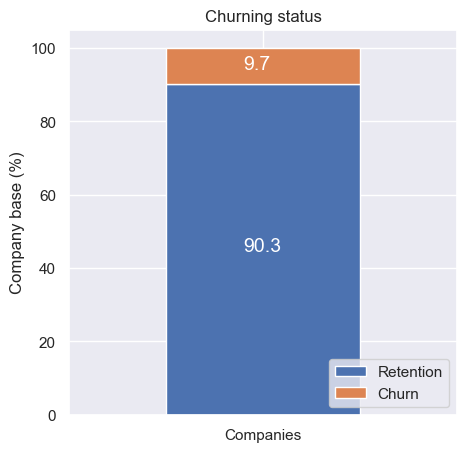

In [42]:
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

### SALES

In [43]:
channel=client_df[['id','channel_sales','churn']]
channel=channel.groupby([channel['channel_sales'],channel['churn']])['id'].count().unstack(level=1).fillna(0)

In [44]:
channel_churn=(channel.div(channel.sum(axis=1),axis=0)*100).sort_values(by=[1],ascending=False)

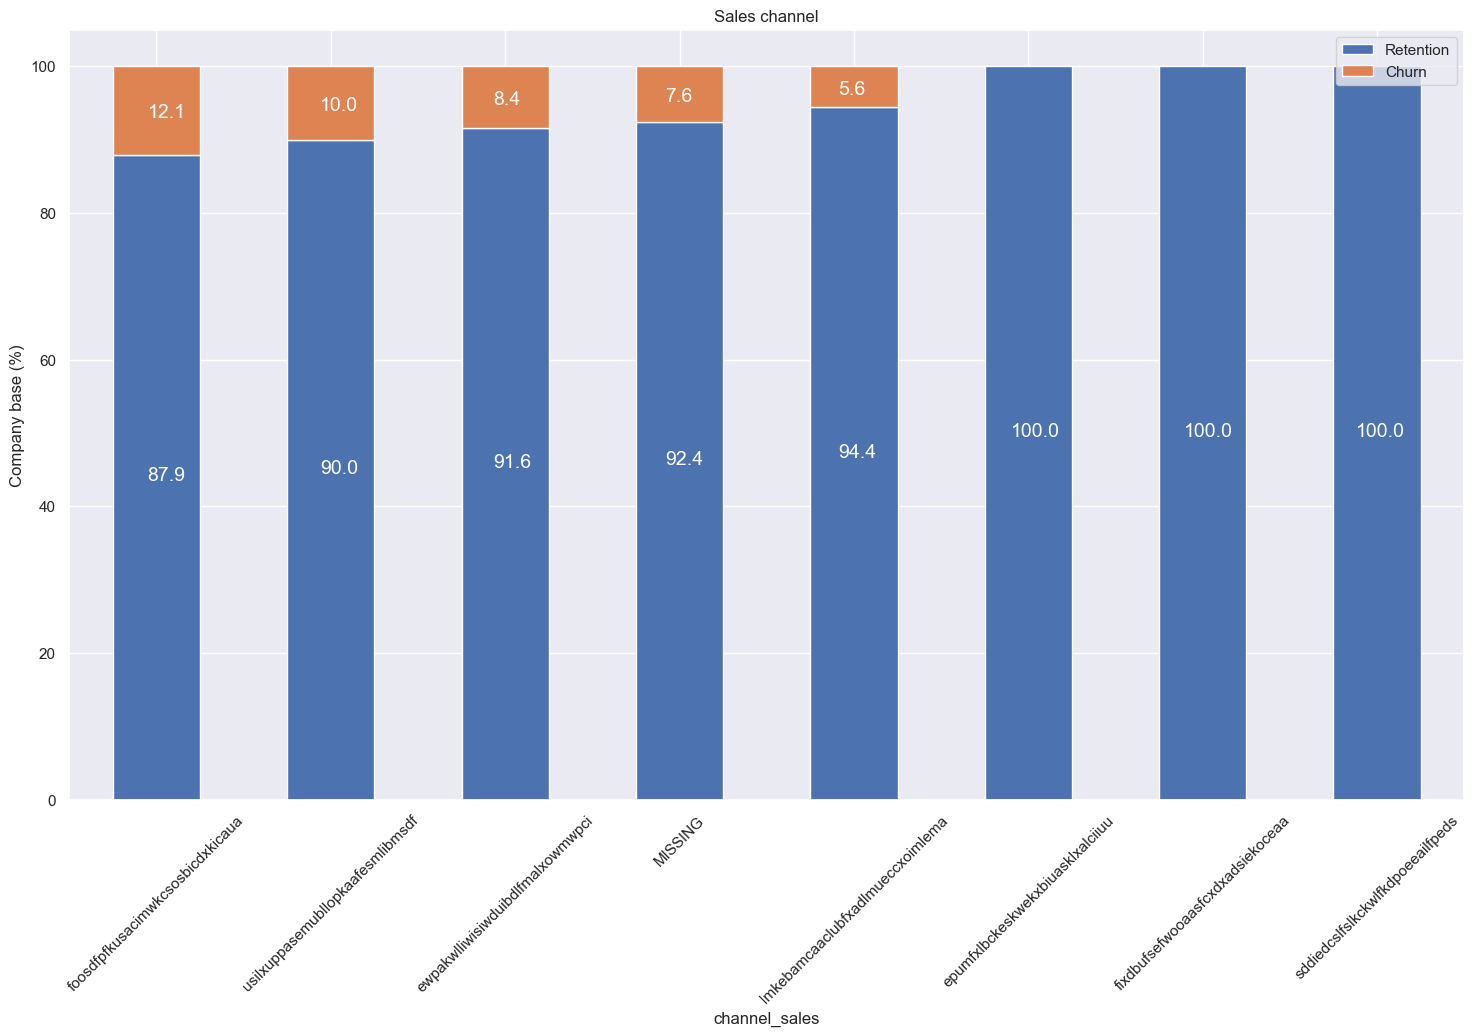

In [45]:
plot_stacked_bars(channel_churn, 'Sales channel', rot_=45)

Here it's important to notice that the channel sales value "MISSING" has 7.6% churn. we need to be mindful of this feature before modelling

### CONSUMPTION

In [56]:
consumption_vars = ['cons_12m', 'has_gas', 'cons_last_month', 'imp_cons']

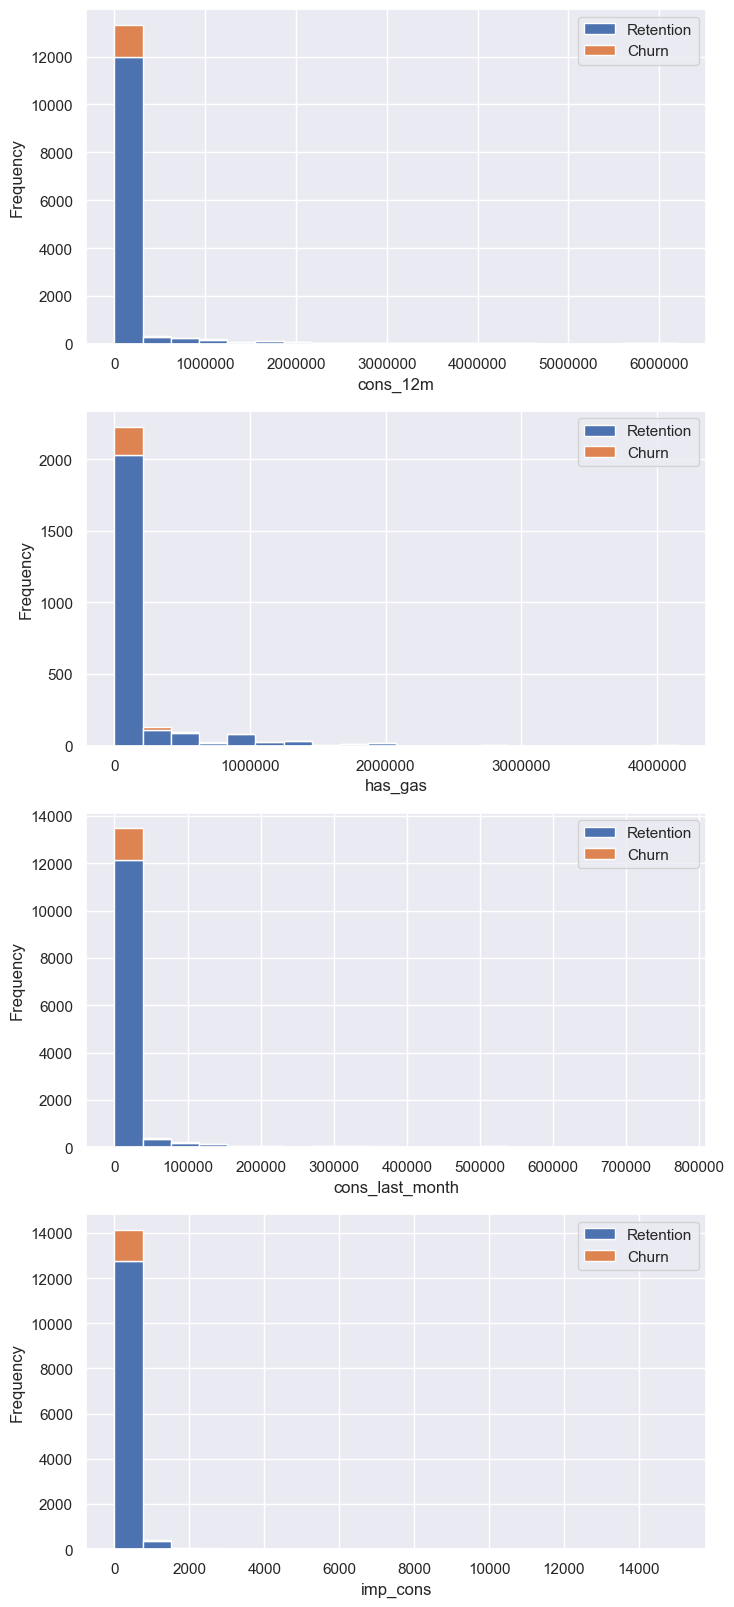

In [57]:
fig, axs = plt.subplots(nrows=len(consumption_vars), figsize=(8, 5 * len(consumption_vars)))

for i, var in enumerate(consumption_vars):
    if var == 'has_gas':
        df = pd.DataFrame({
            'Retention': consumption.loc[(consumption['has_gas'] == 't') & (consumption['churn'] == 0), 'cons_gas_12m'],
            'Churn': consumption.loc[(consumption['has_gas'] == 't') & (consumption['churn'] == 1), 'cons_gas_12m']
        })
    else:
        df = pd.DataFrame({
            'Retention': consumption.loc[consumption['churn'] == 0, var],
            'Churn': consumption.loc[consumption['churn'] == 1, var]
        })

    df[['Retention', 'Churn']].plot(kind='hist', bins=20, ax=axs[i], stacked=True)
    axs[i].set_xlabel(var)
    axs[i].ticklabel_format(style='plain', axis='x')

plt.show()

it looks like the data is highly skewed so we need to check if there are outliers present in the data and we need to deal with the outliers. for now we will plot boxplot to see if there are outliers

c:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\KIIT\anaconda3\lib\site-p

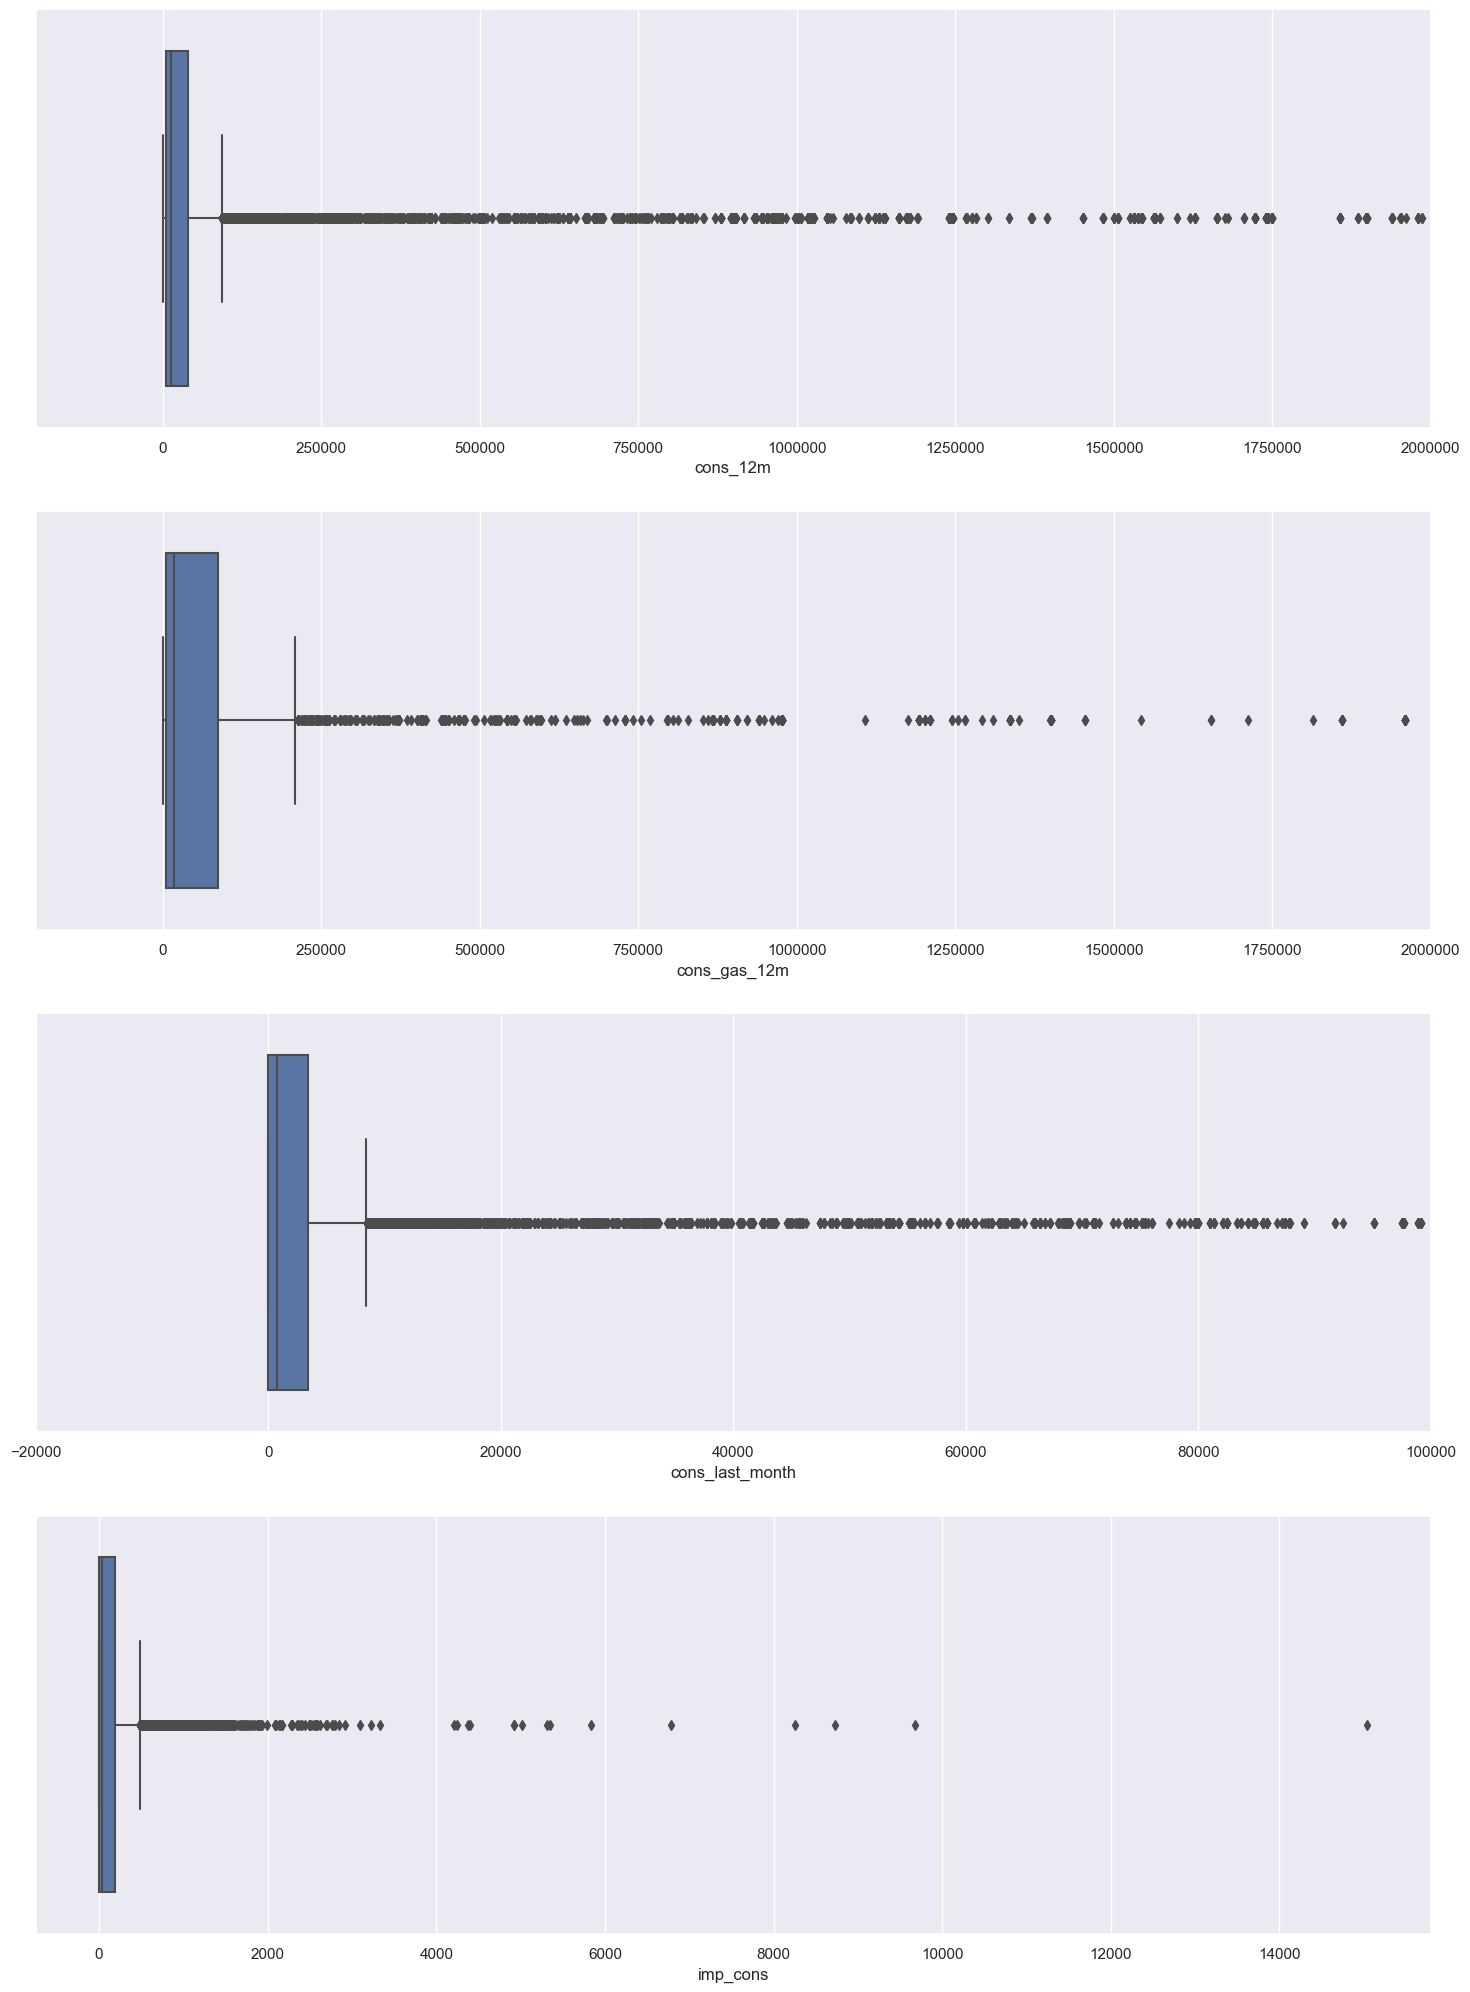

In [59]:
fig, axs = plt.subplots(nrows=4, figsize=(18, 25))

# Define the x-axis limits
x_limits = [(-200000, 2000000), (-200000, 2000000), (-20000, 100000), None]
consumption_vars = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons']

for i, var in enumerate(consumption_vars):
    # Plot boxplot
    sns.boxplot(consumption[consumption['has_gas'] == 't'][var] if var == 'cons_gas_12m' else consumption[var], ax=axs[i])

    # Remove scientific notation
    axs[i].ticklabel_format(style='plain', axis='x')
    if x_limits[i] is not None:
        axs[i].set_xlim(*x_limits[i])

plt.show()

This graph shows we have outliers we will deal with those later 

### FORECAST

In [51]:
client_df.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')

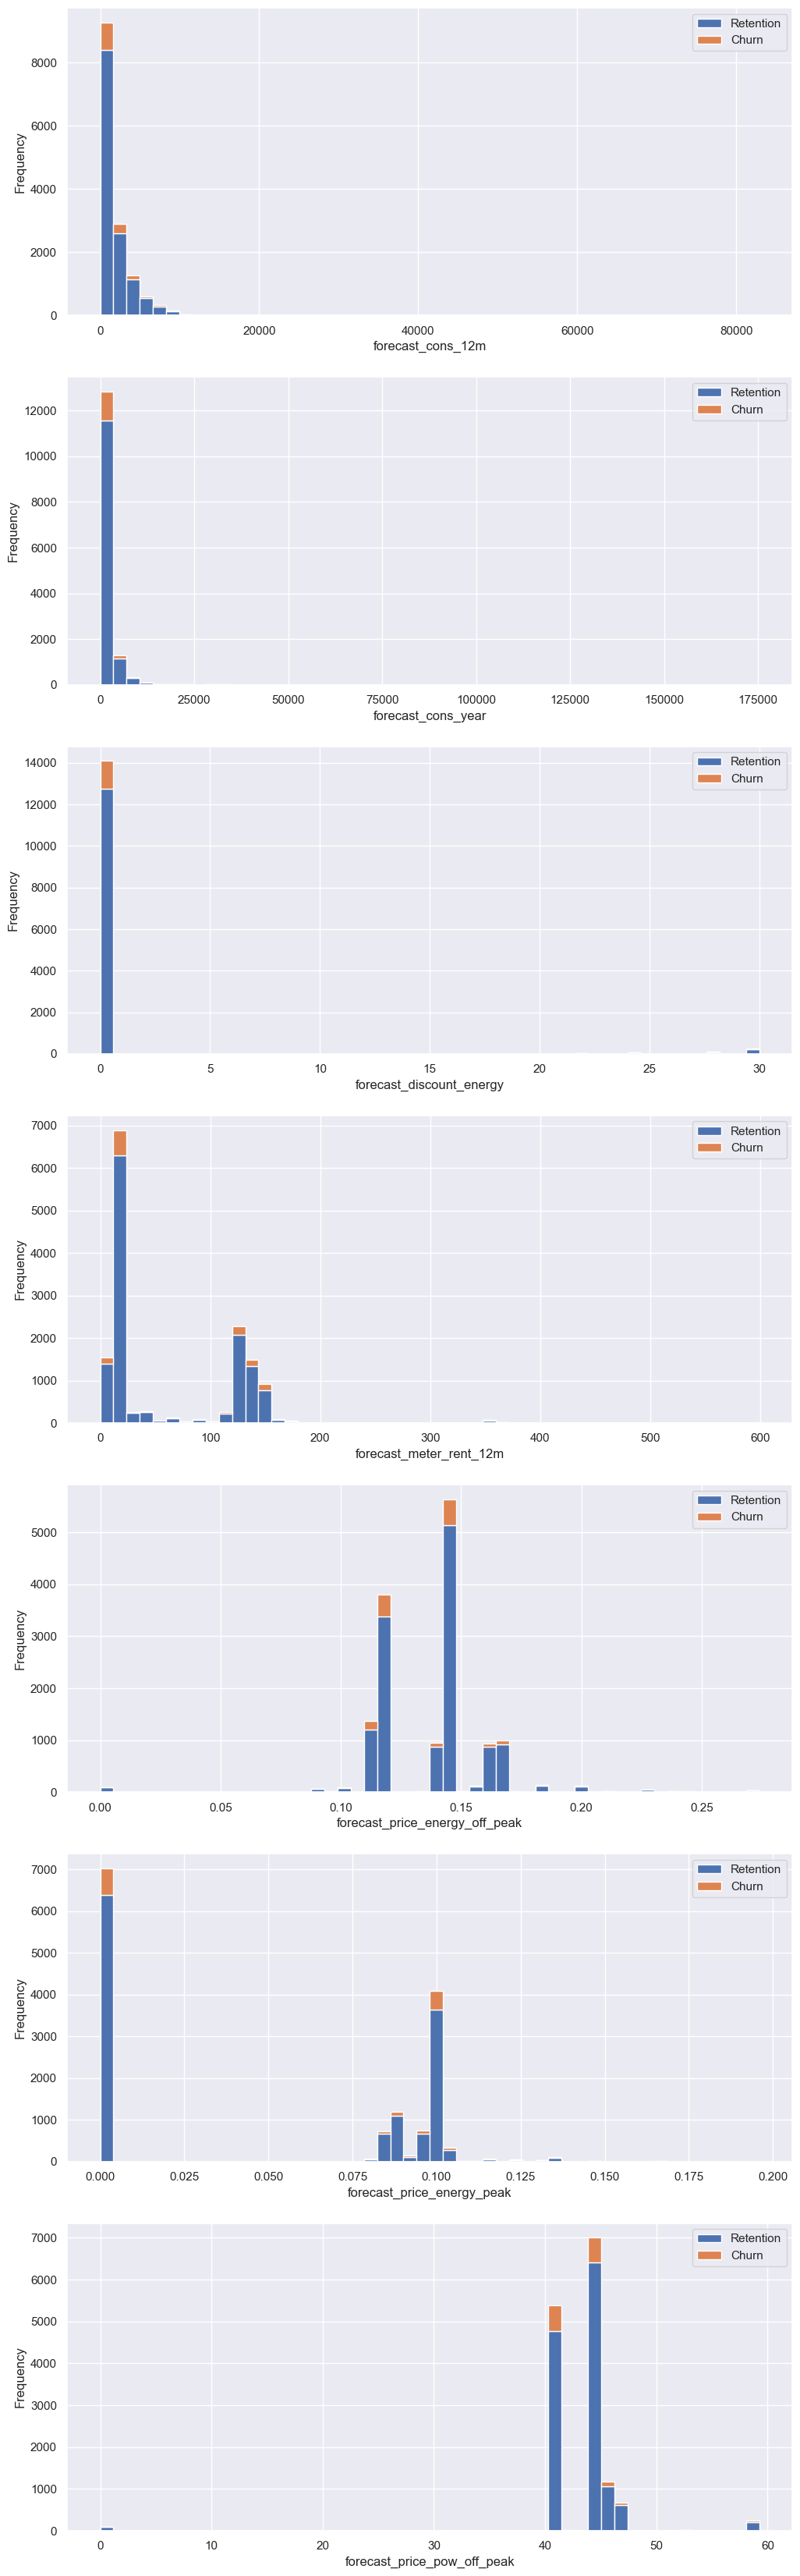

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

forecast_vars = ['forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
                  'forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 
                  'forecast_price_energy_peak', 'forecast_price_pow_off_peak']

fig, axs = plt.subplots(nrows=len(forecast_vars), figsize=(12, 6 * len(forecast_vars)))

for i, var in enumerate(forecast_vars):
    df = pd.DataFrame({
        'Retention': client_df.loc[client_df['churn'] == 0, var],
        'Churn': client_df.loc[client_df['churn'] == 1, var]
    })
    df[['Retention', 'Churn']].plot(kind='hist', bins=50, ax=axs[i], stacked=True)
    axs[i].set_xlabel(var)
    axs[i].ticklabel_format(style='plain', axis='x')

plt.show()


Similar to the consumption plots, here also,a lot of the variables are highly positively skewed. so we will make some transformations later to correct for this skewness.

### CONTRACT TYPE

In [61]:
contract_type = client_df[['id', 'has_gas', 'churn']]
contract = contract_type.groupby([contract_type['churn'], contract_type['has_gas']])['id'].count().unstack(level=0)

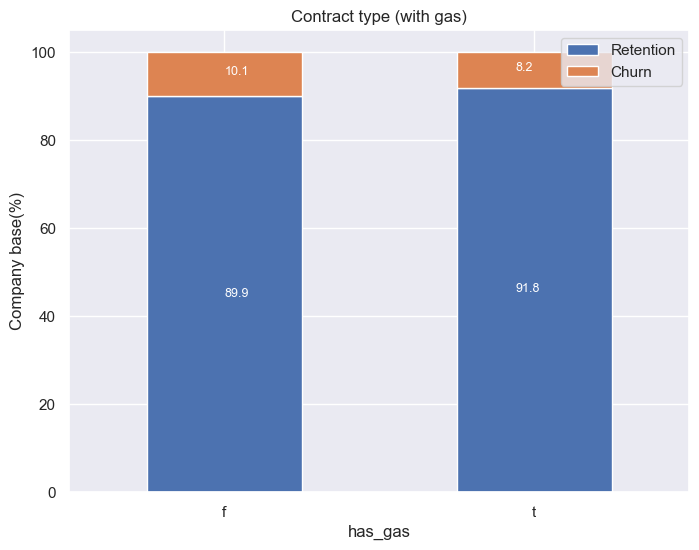

In [68]:
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)
ax = contract_percentage.plot(kind='bar', stacked=True, figsize=(8, 6), rot=0)
for p in ax.patches:
    value = str(round(p.get_height(), 1))
    if value == '0':
        continue  # Corrected spelling here
    ax.annotate(value, ((p.get_x() + p.get_width() / 2) * 0.94, p.get_y() + p.get_height() / 2 * 0.99),
                color='white', size=(9))
plt.title('Contract type (with gas)')
plt.legend(['Retention', 'Churn'], loc="upper right")
plt.ylabel("Company base(%)")
plt.show()

### MARGINS

In [69]:
margin = client_df[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']]

c:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


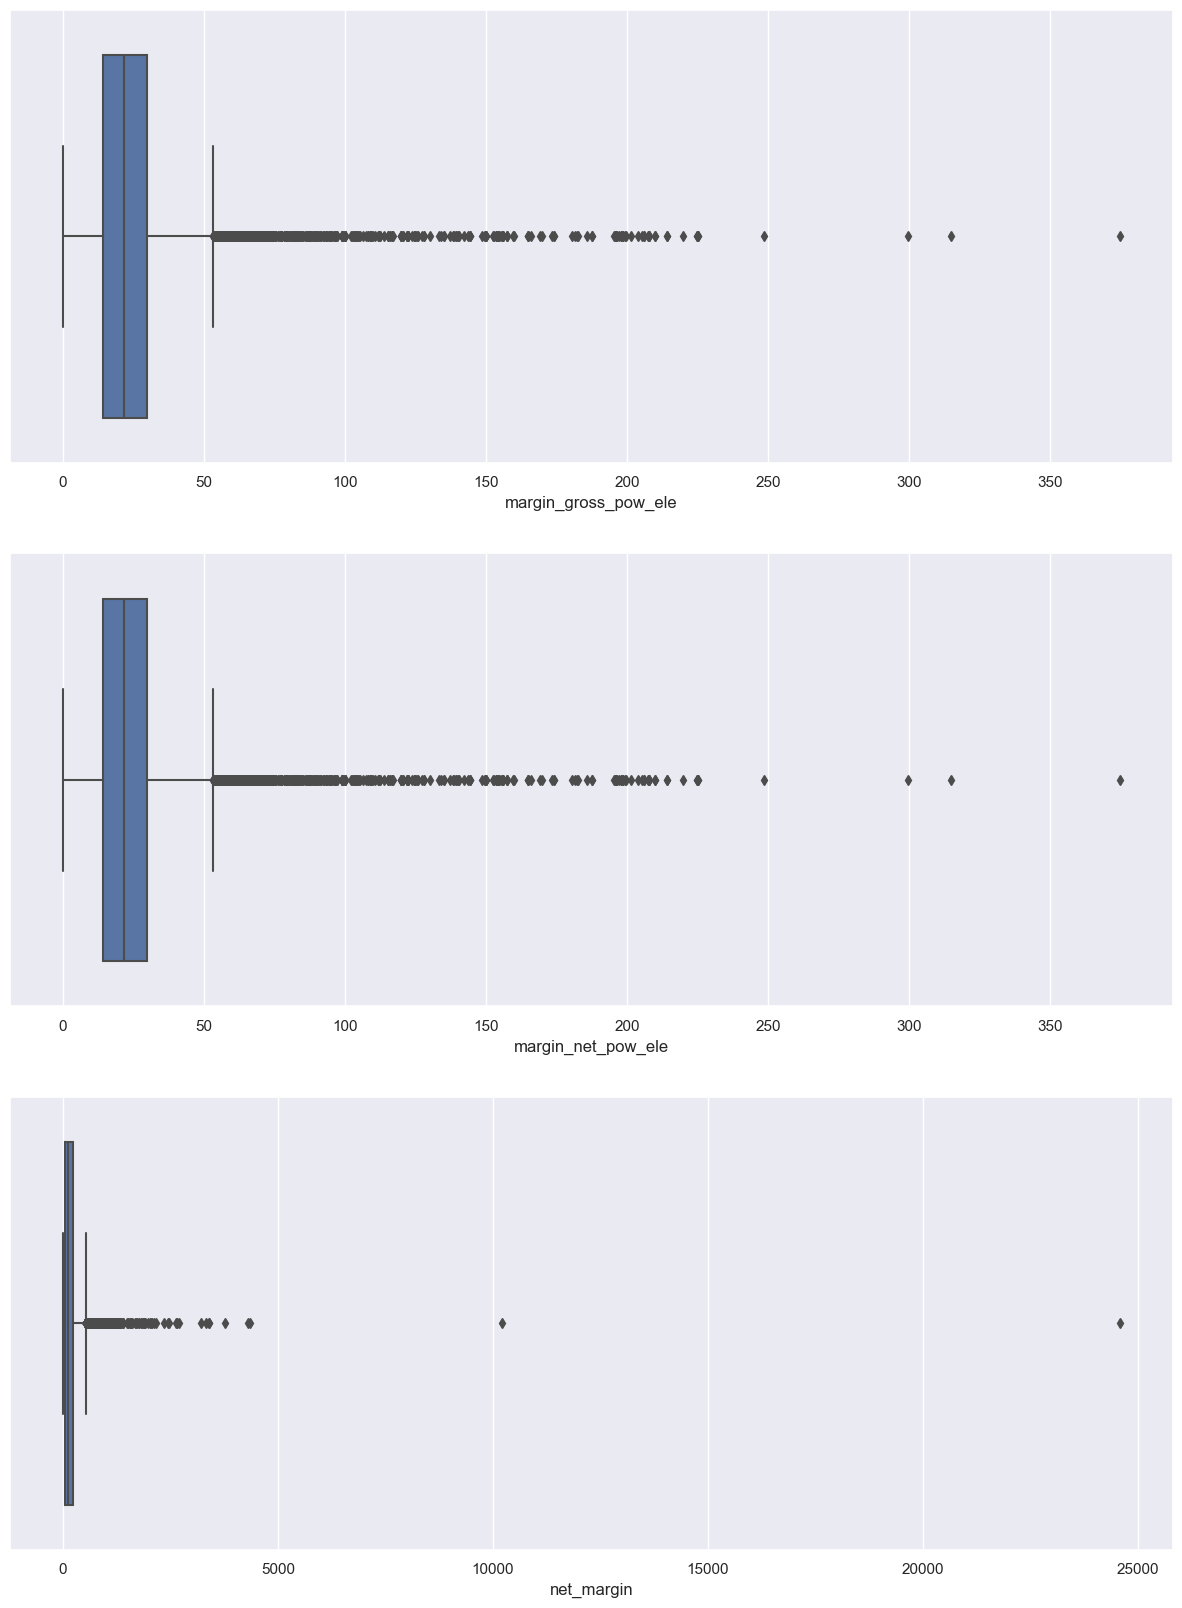

In [71]:
fig,axs=plt.subplots(nrows=3,figsize=(15,20))
sns.boxplot(margin['margin_gross_pow_ele'],ax=axs[0])
sns.boxplot(margin['margin_net_pow_ele'],ax=axs[1])
sns.boxplot(margin['net_margin'],ax=axs[2])
for ax in axs:
    ax.ticklabel_format(style='plain',axis='x')
plt.show()

Here also we can see some outliers

### SUBSCRIBED POWER

In [72]:
power = client_df[['id', 'pow_max', 'churn']]

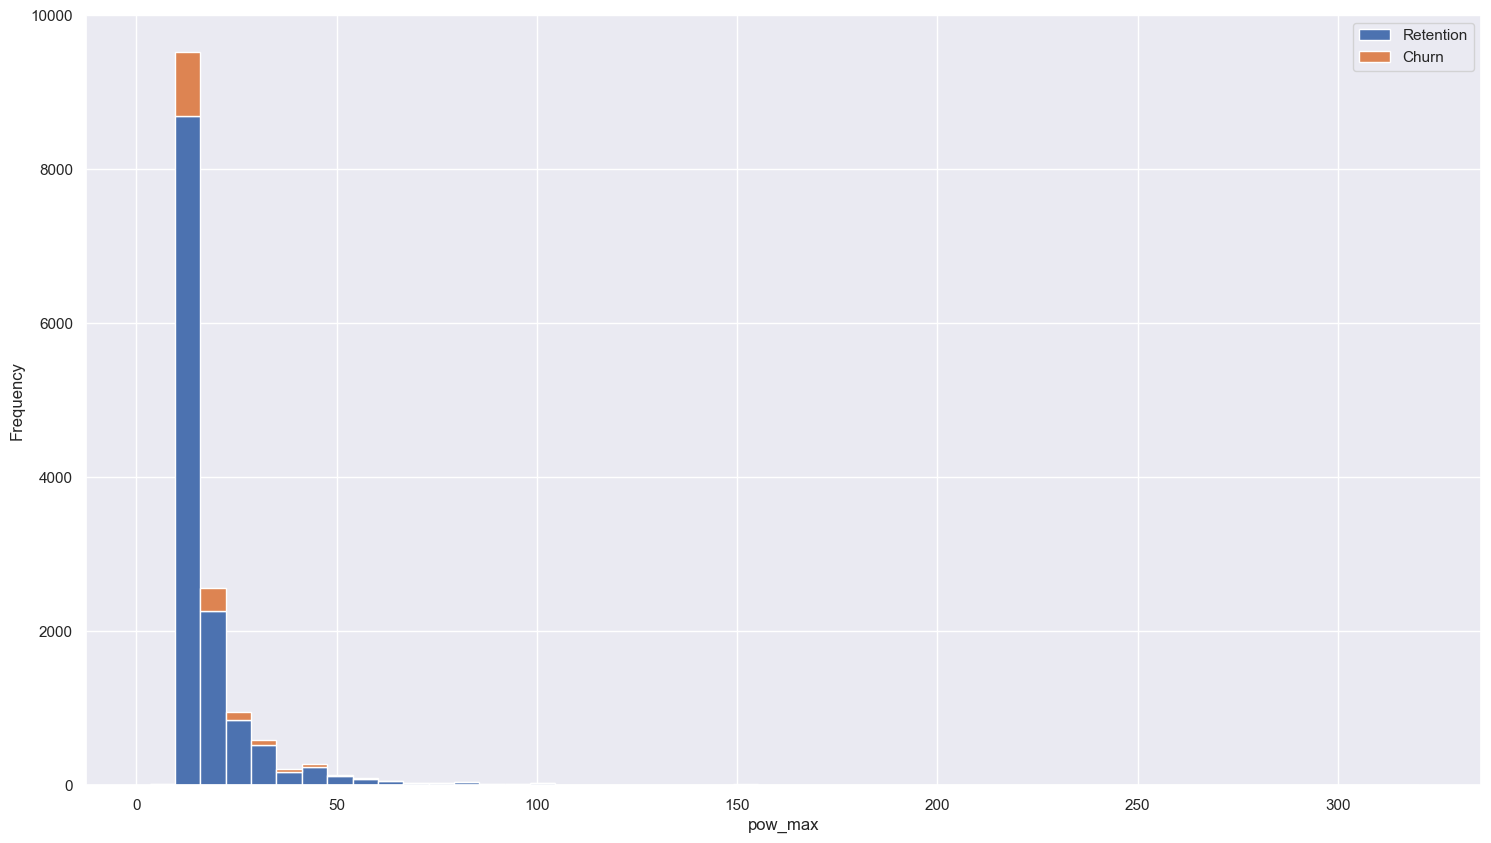

In [73]:
fig, axs = plt.subplots(nrows=1, figsize=(18, 10))
plot_distribution(power, 'pow_max', axs)

In [74]:
others = client_df[['id', 'nb_prod_act', 'num_years_antig', 'origin_up', 'churn']]
products = others.groupby([others["nb_prod_act"],others["churn"]])["id"].count().unstack(level=1)
products_percentage = (products.div(products.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

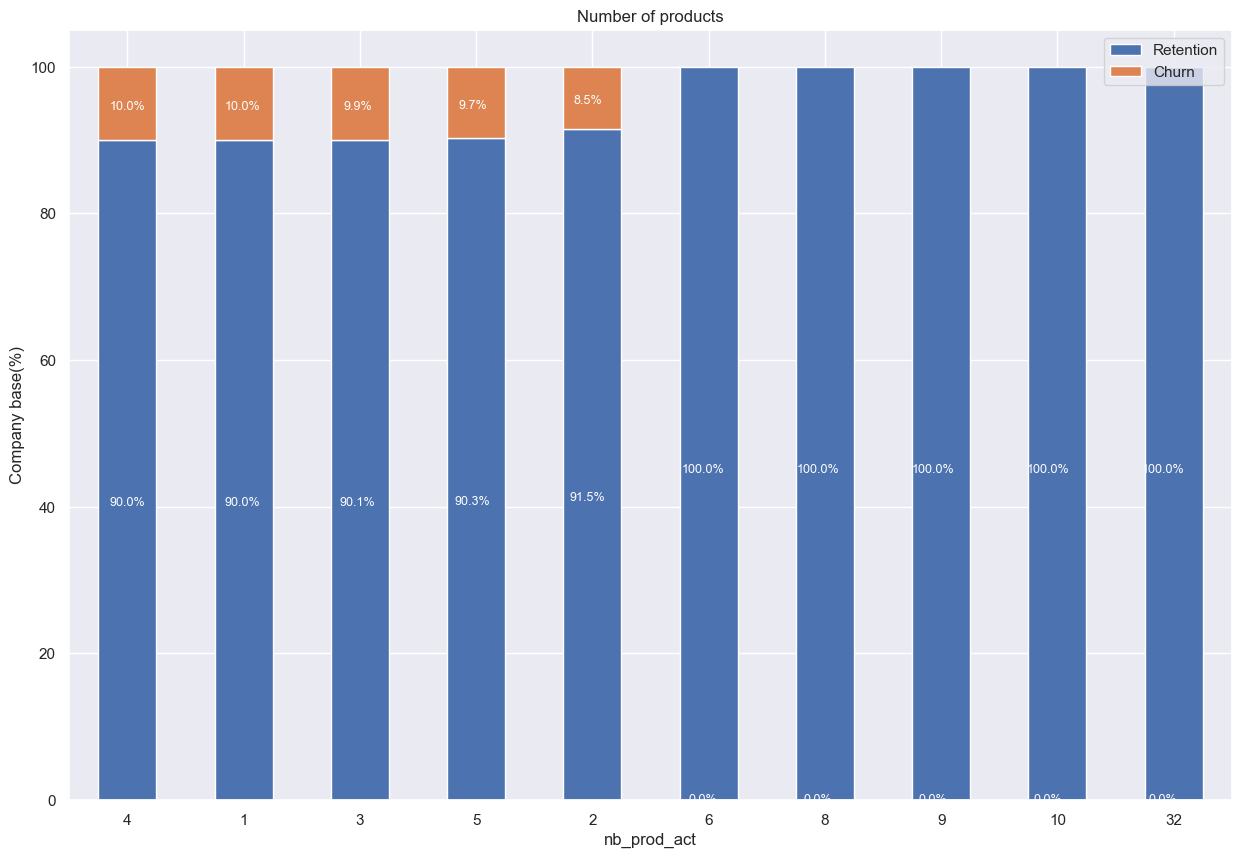

In [75]:
ax = products_percentage.plot(kind='bar', stacked=True, figsize=(15, 10), rot=0)

for p in ax.patches:
    value = str(round(p.get_height(), 1))
    
    # Skip annotating if the value is zero
    if value == '0':
        continue
    
    # Annotate each bar with the percentage value
    ax.annotate(f"{value}%", 
                ((p.get_x() + p.get_width() / 2) * 0.99, p.get_y() + p.get_height() / 2 * 0.9),
                color='white', size=9, ha='center', va='center')

plt.title('Number of products')
plt.legend(['Retention', 'Churn'], loc="upper right")
plt.ylabel("Company base(%)")
plt.show()

In [76]:
years_antig = others.groupby([others["num_years_antig"],others["churn"]])["id"].count().unstack(level=1)
years_antig_percentage = (years_antig.div(years_antig.sum(axis=1), axis=0)*100)

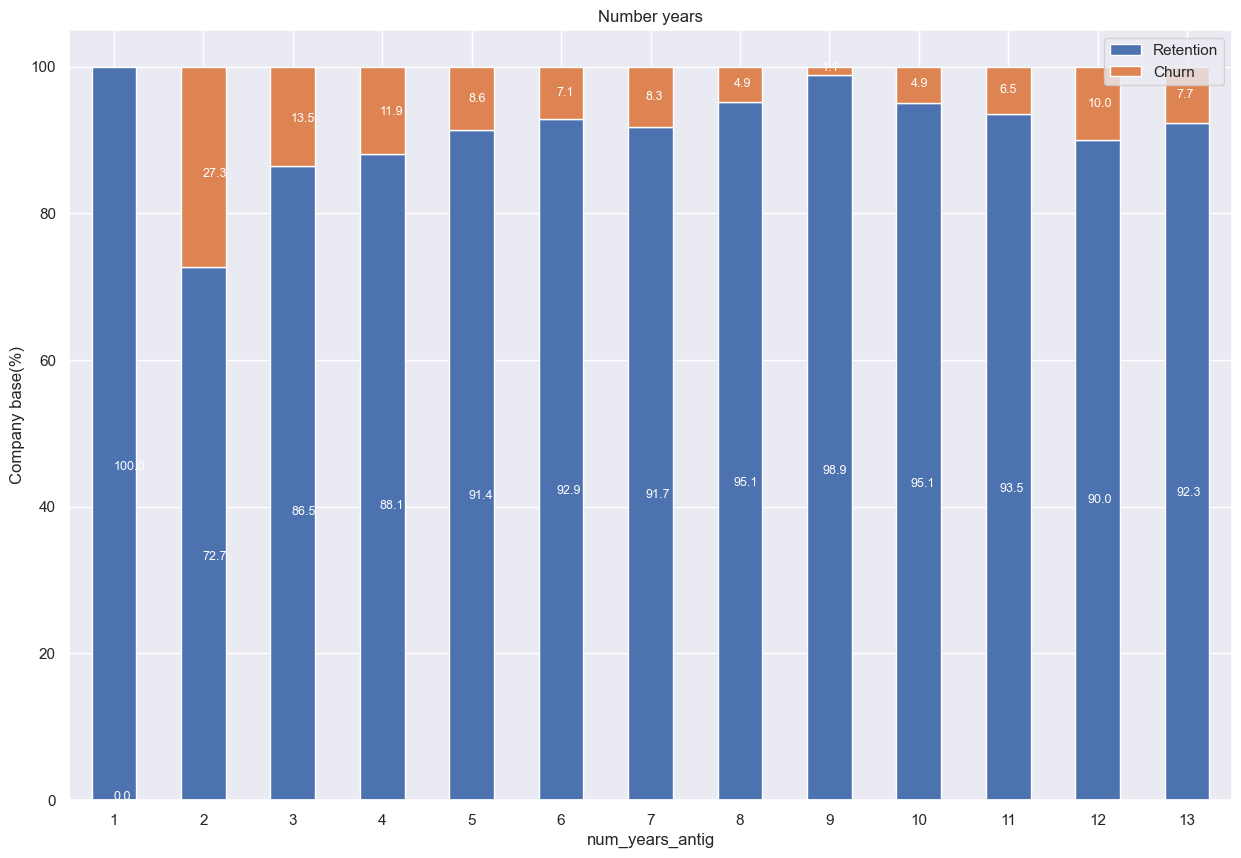

In [77]:
ax=years_antig_percentage.plot(kind='bar',stacked=True,figsize=(15,10),rot=0)
for p in ax.patches:
    value=str(round(p.get_height(),1))
    if value=='0':
        countinue
    ax.annotate(value,((p.get_x()+p.get_width()/2)*0.99,p.get_y()+p.get_height()/2*0.9),
               color='white',size=(9))
plt.title('Number years')
plt.legend(['Retention','Churn'],loc="upper right")
plt.ylabel("Company base(%)");

In [78]:
origin = others.groupby([others["origin_up"],others["churn"]])["id"].count().unstack(level=1)
origin_percentage = (origin.div(origin.sum(axis=1), axis=0)*100)

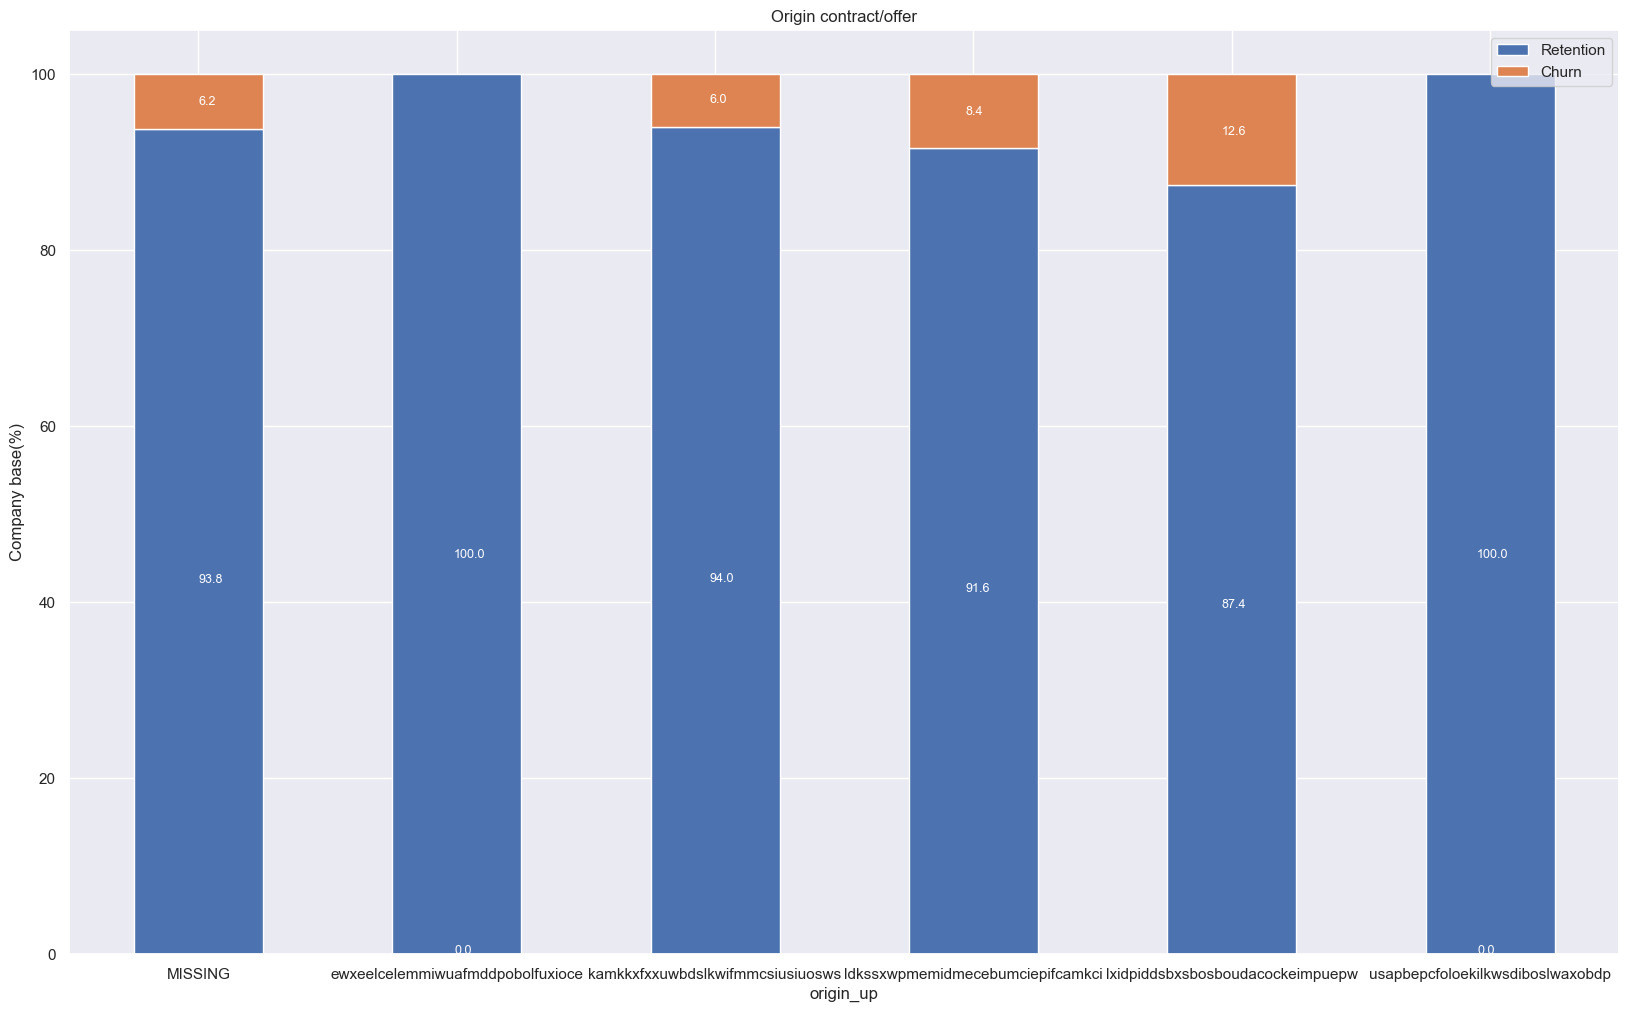

In [79]:
ax=origin_percentage.plot(kind='bar',stacked=True,figsize=(20,12),rot=0)
for p in ax.patches:
    value=str(round(p.get_height(),1))
    if value=='0':
        countinue
    ax.annotate(value,((p.get_x()+p.get_width()/2)*0.99,p.get_y()+p.get_height()/2*0.9),
               color='white',size=(9))
plt.title('Origin contract/offer')
plt.legend(['Retention','Churn'],loc="upper right")
plt.ylabel("Company base(%)");

In [80]:
dates=client_df[['id','date_activ','date_end','date_modif_prod','date_renewal','churn']].copy()
dates['date_activ']=pd.to_datetime(dates['date_activ'],format='%Y-%m-%d')
dates['date_end']=pd.to_datetime(dates['date_end'],format='%Y-%m-%d')
dates['date_modif_prod']=pd.to_datetime(dates['date_modif_prod'],format='%Y-%m-%d')
dates['date_renewal']=pd.to_datetime(dates['date_renewal'],format='%Y-%m-%d')

In [81]:
def line_format(label):
    month=label.month_name()[:1]
    if label.month_name()=="January":
        month+=f'\n{label.year}'
    return month

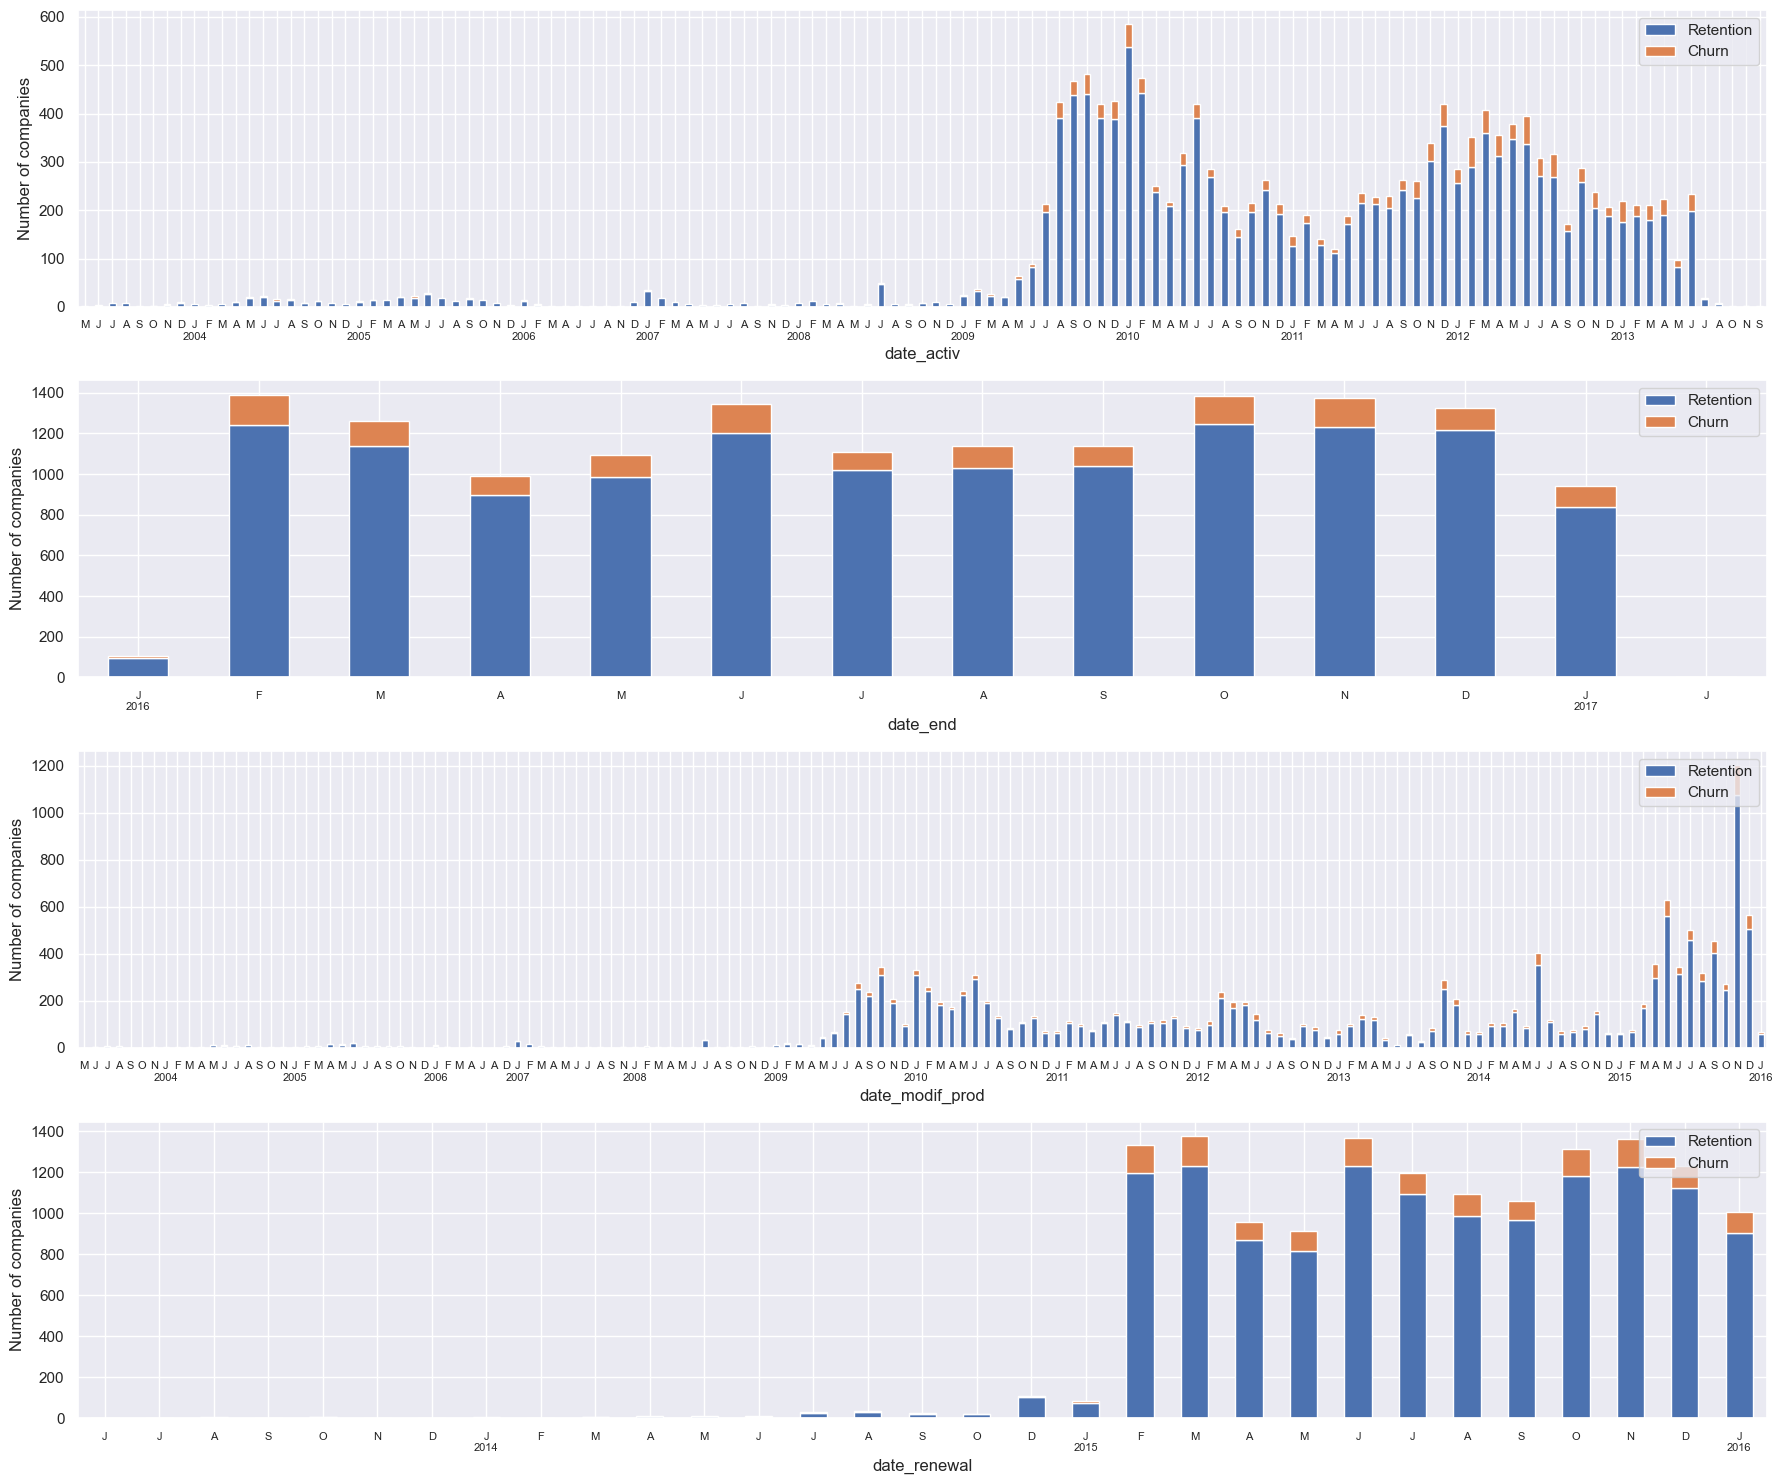

In [83]:
fig, axs = plt.subplots(nrows=4, figsize=(18, 15))

# Define the date columns and their corresponding axes
date_columns = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']
axes = axs.flatten()

for i, date_col in enumerate(date_columns):
    date_data = dates[[date_col, 'churn', 'id']].set_index(date_col)
    date_counts = date_data.groupby([pd.Grouper(freq='M'), 'churn']).count().unstack(level=1)
    
    # Plot the bar chart
    date_counts.plot(kind='bar', stacked=True, rot=0, ax=axes[i])
    
    # Customize x-axis labels
    axes[i].set_xticklabels(map(lambda x: line_format(x), date_counts.index), fontsize=8)
    
    # Set y-axis label
    axes[i].set_ylabel("Number of companies")
    
    # Set legend
    axes[i].legend(['Retention', 'Churn'], loc='upper right')

# Adjust layout to prevent x-label overlap
plt.tight_layout()

plt.show()


### PRICE DATA

In [89]:
price_df.columns

Index(['id', 'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix'],
      dtype='object')

In [85]:
price_df['id'].value_counts().value_counts()

12    15990
11       83
10       11
9         6
8         3
7         3
Name: id, dtype: int64

In [90]:
price_df['price_date'].value_counts()

2015-08-01    16094
2015-12-01    16094
2015-07-01    16090
2015-11-01    16087
2015-06-01    16085
2015-10-01    16085
2015-02-01    16082
2015-09-01    16082
2015-05-01    16080
2015-04-01    16079
2015-03-01    16074
2015-01-01    16070
Name: price_date, dtype: int64

In [86]:
def plot_churn_histogram(df, target_variable, figsize=(20,5), bins=100, if_churn=True):
    fig = plt.figure(figsize=figsize)
    if if_churn:
        ax = sns.histplot(data=df, x=target_variable, bins=bins, hue='churn')
    else:
        ax = sns.histplot(data=df, x=target_variable, bins=bins)

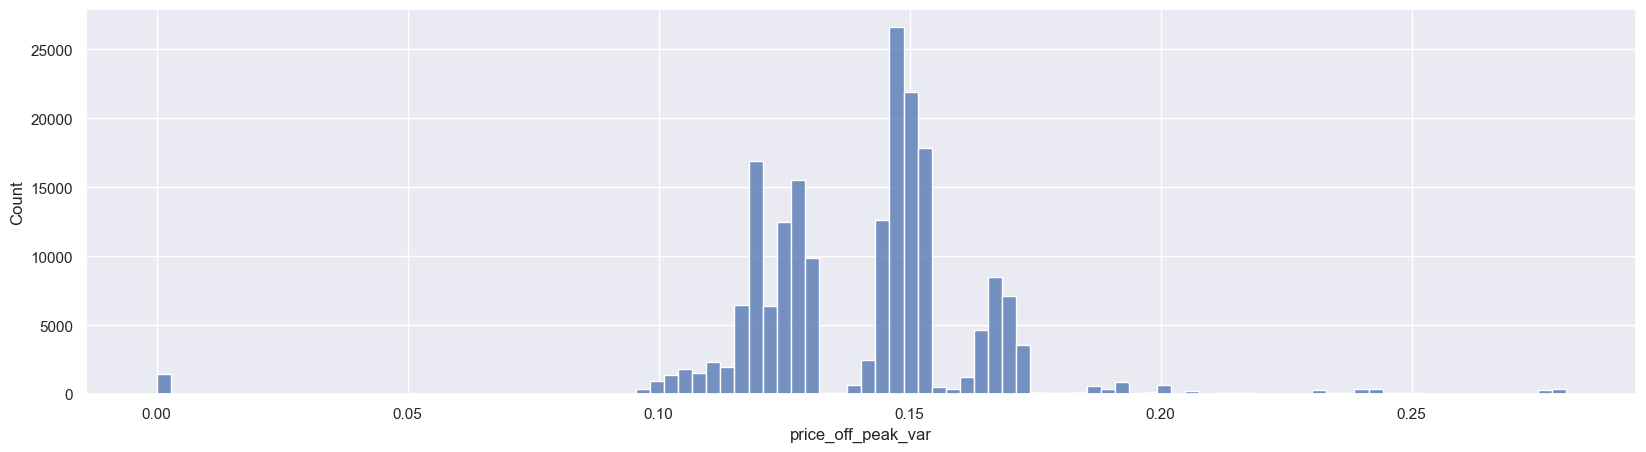

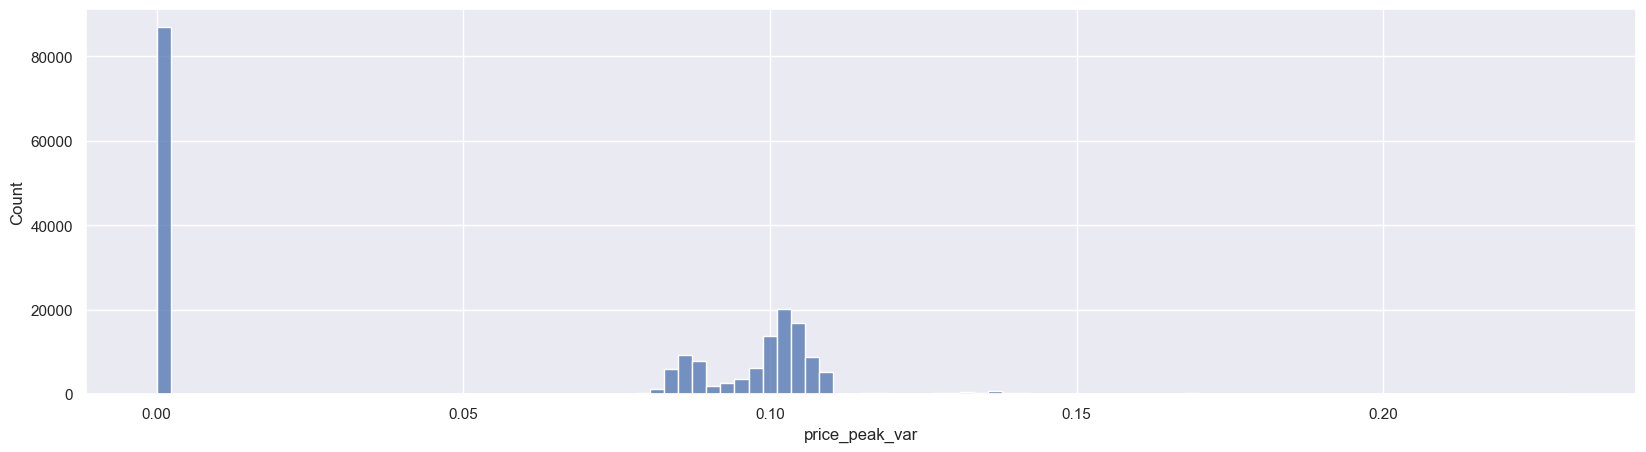

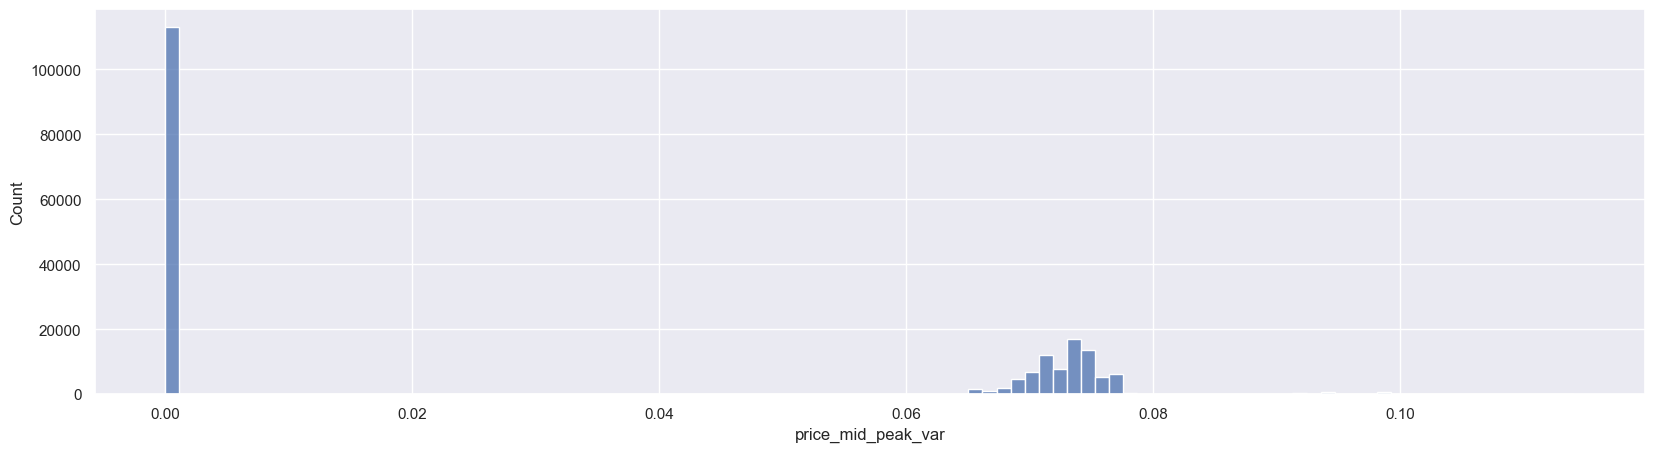

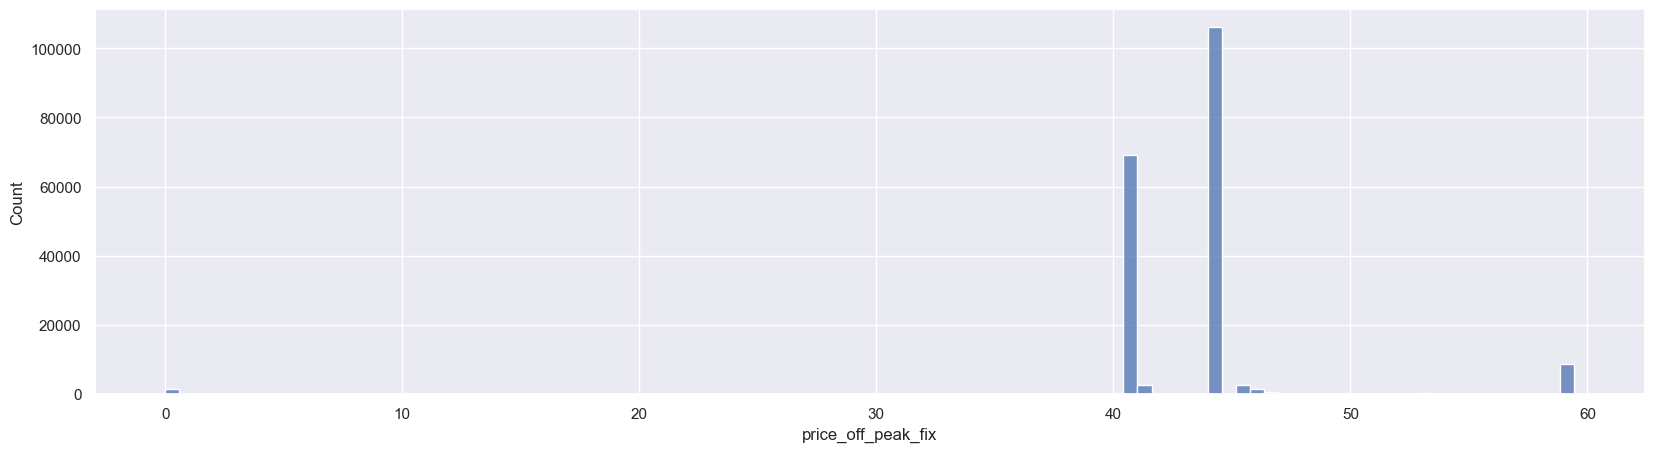

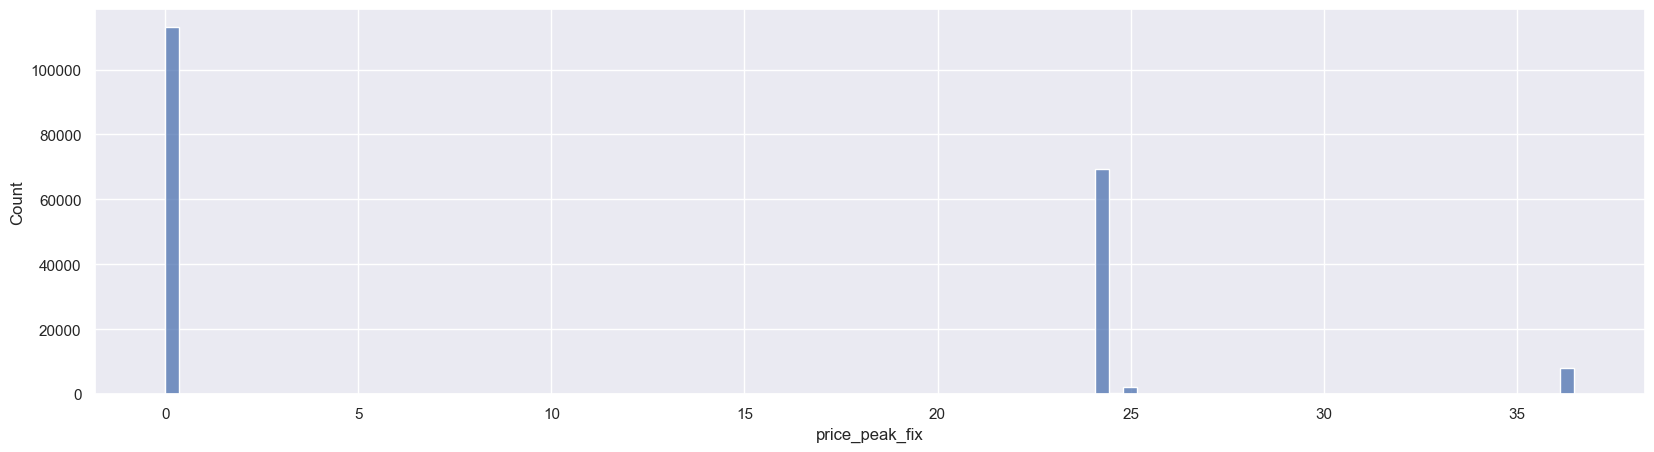

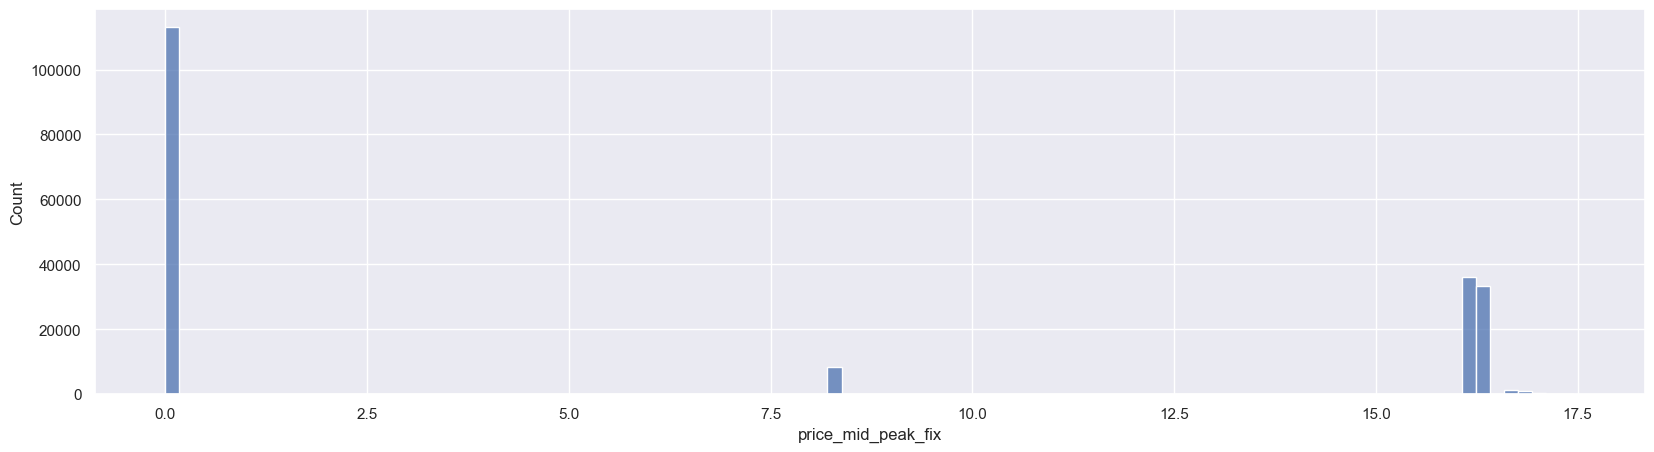

In [88]:
for attr in ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']:
    plot_churn_histogram(df=price_df, target_variable=attr, if_churn=False)

### HYPOTHESIS TESTING

In [91]:
client_df.dtypes

id                                 object
channel_sales                      object
cons_12m                            int64
cons_gas_12m                        int64
cons_last_month                     int64
date_activ                         object
date_end                           object
date_modif_prod                    object
date_renewal                       object
forecast_cons_12m                 float64
forecast_cons_year                  int64
forecast_discount_energy          float64
forecast_meter_rent_12m           float64
forecast_price_energy_off_peak    float64
forecast_price_energy_peak        float64
forecast_price_pow_off_peak       float64
has_gas                            object
imp_cons                          float64
margin_gross_pow_ele              float64
margin_net_pow_ele                float64
nb_prod_act                         int64
net_margin                        float64
num_years_antig                     int64
origin_up                         

In [92]:
# Transform date columns to datetime type
client_df["date_activ"] = pd.to_datetime(client_df["date_activ"], format='%Y-%m-%d')
client_df["date_end"] = pd.to_datetime(client_df["date_end"], format='%Y-%m-%d')
client_df["date_modif_prod"] = pd.to_datetime(client_df["date_modif_prod"], format='%Y-%m-%d')
client_df["date_renewal"] = pd.to_datetime(client_df["date_renewal"], format='%Y-%m-%d')
price_df['price_date'] = pd.to_datetime(price_df['price_date'], format='%Y-%m-%d')

In [107]:
# Create mean average data
mean_year = price_df.groupby(['id']).mean().reset_index()
mean_half_year = price_df[price_df['price_date'] > '2015-06-01'].groupby(['id']).mean().reset_index()
mean_quarterly = price_df[price_df['price_date'] > '2015-10-01'].groupby(['id']).mean().reset_index()

In [94]:
mean_year.head()

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000


In [97]:
mean_year = mean_year.rename(

    columns={
        "price_off_peak_var": "mean_year_price_off_peak_var",
        "price_peak_var": "mean_year_price_peak_var",
        "price_mid_peak_var": "mean_year_price_mid_peak_var",
        "price_off_peak_fix": "mean_year_price_off_peak_fix",
        "price_peak_fix": "mean_year_price_peak_fix",
        "price_mid_peak_fix": "mean_year_price_mid_peak_fix"
    }
)

In [98]:
mean_year["mean_year_price_off_peak"] = mean_year["mean_year_price_off_peak_var"] + mean_year["mean_year_price_off_peak_fix"]
mean_year["mean_year_price_peak"] = mean_year["mean_year_price_peak_var"] + mean_year["mean_year_price_peak_fix"]
mean_year["mean_year_price_med_peak"] = mean_year["mean_year_price_mid_peak_var"] + mean_year["mean_year_price_mid_peak_fix"]

In [105]:
mean_half_year = mean_half_year.rename(

    columns={
        "price_off_peak_var": "mean_half_year_price_off_peak_var",
        "price_peak_var": "mean_half_year_price_peak_var",
        "price_mid_peak_var": "mean_half_year_price_mid_peak_var",
        "price_off_peak_fix": "mean_half_year_price_off_peak_fix",
        "price_peak_fix": "mean_half_year_price_peak_fix",
        "price_mid_peak_fix": "mean_half_year_price_mid_peak_fix"
    }
)

In [106]:
mean_half_year["mean_half_year_price_off_peak"] = mean_half_year["mean_half_year_price_off_peak_var"] + mean_half_year["mean_half_year_price_off_peak_fix"]
mean_half_year["mean_half_year_price_peak"] = mean_half_year["mean_half_year_price_peak_var"] + mean_half_year["mean_half_year_price_peak_fix"]
mean_half_year["mean_half_year_price_med_peak"] = mean_half_year["mean_half_year_price_mid_peak_var"] + mean_half_year["mean_half_year_price_mid_peak_fix"]

In [108]:
mean_quarterly = mean_quarterly.rename(

    columns={
        "price_off_peak_var": "mean_quarterly_price_off_peak_var",
        "price_peak_var": "mean_quarterly_price_peak_var",
        "price_mid_peak_var": "mean_quarterly_price_mid_peak_var",
        "price_off_peak_fix": "mean_quarterly_price_off_peak_fix",
        "price_peak_fix": "mean_quarterly_price_peak_fix",
        "price_mid_peak_fix": "mean_quarterly_price_mid_peak_fix"
    }
)

mean_quarterly["mean_quarterly_price_off_peak"] = mean_quarterly["mean_quarterly_price_off_peak_var"] + mean_quarterly["mean_quarterly_price_off_peak_fix"]
mean_quarterly["mean_quarterly_price_peak"] = mean_quarterly["mean_quarterly_price_peak_var"] + mean_quarterly["mean_quarterly_price_peak_fix"]
mean_quarterly["mean_quarterly_price_med_peak"] = mean_quarterly["mean_quarterly_price_mid_peak_var"] + mean_quarterly["mean_quarterly_price_mid_peak_fix"]

In [109]:
# Merge

price_feature = pd.merge(mean_year, mean_half_year,on='id')
price_feature = pd.merge(price_feature, mean_quarterly, on='id')

In [110]:
price_feature.head()

,id,price_off_peak_var_x,price_peak_var_x,price_mid_peak_var_x,price_off_peak_fix_x,price_peak_fix_x,price_mid_peak_fix_x,price_off_peak_var_y,price_peak_var_y,price_mid_peak_var_y,...,price_mid_peak_fix_y,mean_quarterly_price_off_peak_var,mean_quarterly_price_peak_var,mean_quarterly_price_mid_peak_var,mean_quarterly_price_off_peak_fix,mean_quarterly_price_peak_fix,mean_quarterly_price_mid_peak_fix,mean_quarterly_price_off_peak,mean_quarterly_price_peak,mean_quarterly_price_med_peak
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,0.121266,0.102368,0.073728,...,16.291555,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,0.144687,0.000000,0.000000,...,0.000000,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,0.202024,0.000000,0.000000,...,0.000000,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,0.114428,0.096080,0.069418,...,16.291555,0.113068,0.095385,0.069409,40.728885,24.43733,16.291555,40.841953,24.532715,16.360964
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,0.146184,0.000000,0.000000,...,0.000000,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000


In [112]:
price_analysis = pd.merge(price_feature, client_df[['id', 'churn']], on='id')
price_analysis.head()

,id,price_off_peak_var_x,price_peak_var_x,price_mid_peak_var_x,price_off_peak_fix_x,price_peak_fix_x,price_mid_peak_fix_x,price_off_peak_var_y,price_peak_var_y,price_mid_peak_var_y,...,mean_quarterly_price_off_peak_var,mean_quarterly_price_peak_var,mean_quarterly_price_mid_peak_var,mean_quarterly_price_off_peak_fix,mean_quarterly_price_peak_fix,mean_quarterly_price_mid_peak_fix,mean_quarterly_price_off_peak,mean_quarterly_price_peak,mean_quarterly_price_med_peak,churn
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,0.121266,0.102368,0.073728,...,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274,0
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,0.144687,0.000000,0.000000,...,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,0.202024,0.000000,0.000000,...,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000,0
3,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,0.146184,0.000000,0.000000,...,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000,0
4,0013f326a839a2f6ad87a1859952d227,0.126076,0.105542,0.074921,40.728885,24.437330,16.291555,0.123007,0.104108,0.075469,...,0.121647,0.103413,0.075460,40.728885,24.43733,16.291555,40.850532,24.540743,16.367015,0


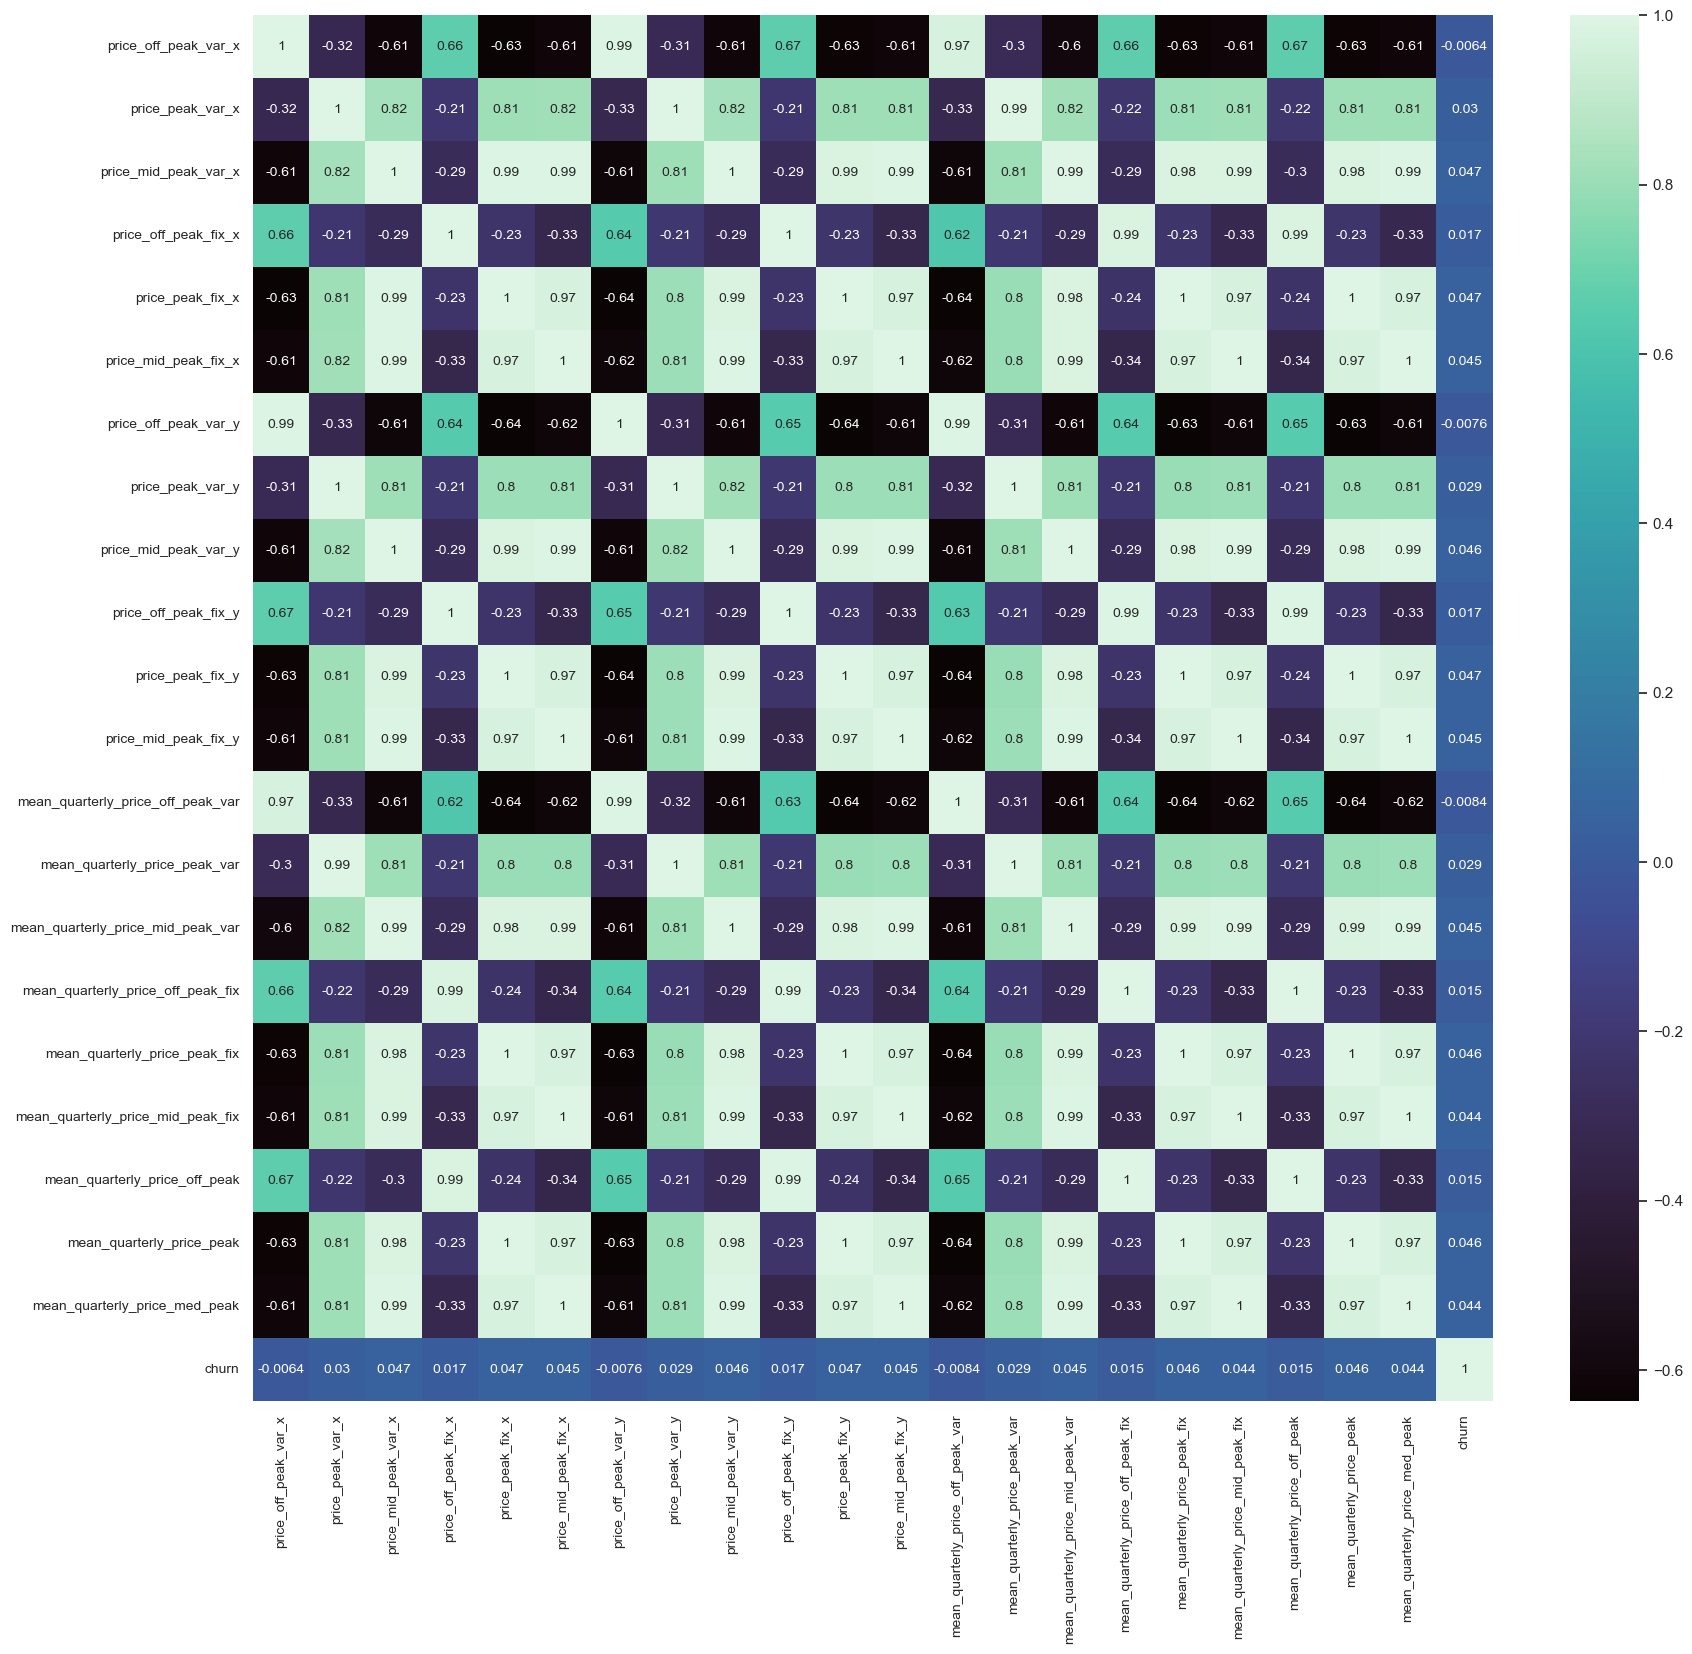

In [117]:
corr = price_analysis.corr()
# Plot correlation
plt.figure(figsize=(20,18))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values,  cmap='mako', annot = True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

The correlation plot reveals a stronger correlation among other price sensitivity variables, while the overall correlation with churn remains notably low. This implies a limited linear association between price sensitivity and churn.

In [118]:
merged_data = pd.merge(client_df.drop(columns=['churn']), price_analysis, on='id')

In [119]:
merged_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_quarterly_price_off_peak_var,mean_quarterly_price_peak_var,mean_quarterly_price_mid_peak_var,mean_quarterly_price_off_peak_fix,mean_quarterly_price_peak_fix,mean_quarterly_price_mid_peak_fix,mean_quarterly_price_off_peak,mean_quarterly_price_peak,mean_quarterly_price_med_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0


In [120]:
merged_data.to_csv('clean_data_after_eda.csv')